<a href="https://colab.research.google.com/github/nestorfranca/Sinais/blob/main/Prova3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1

###b)

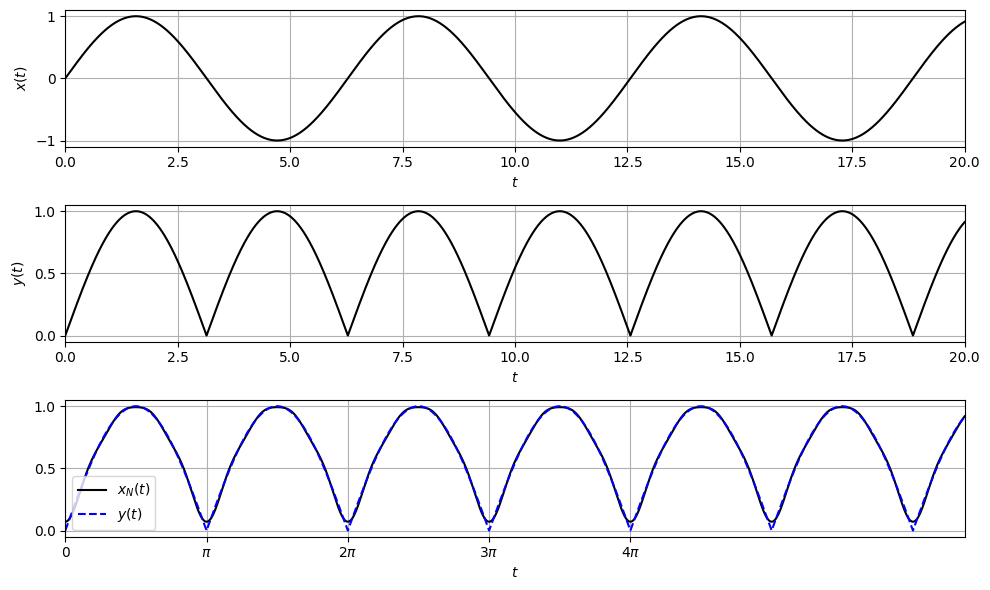

In [ ]:
import numpy as np                      #Importa a biblioteca numpy
import numpy.fft as fft                 #Importa a biblioteca numpy.fft
import matplotlib.pyplot as plt         #Importa a biblioteca matplotlib.pyplot
import scipy.integrate as integrate     #Importa a biblioteca scipy.integrate

#Definicao do Sinal em um periodo
def xp(t):
    return np.abs(np.sin(t))

#Definicao da Expressao do Sinal
def xtilde(t,T0):
    return xp(np.mod(t,T0))

#Parametrizacao de simulacao
Ts = 1e-4                               #Passo
t = np.arange(0,20,Ts)                  #Vetor de tempo
T0 = np.pi;                             #Periodo fundamental
w0 = 2*np.pi/T0;                        #Frequencia fundamental
x = xtilde(t,T0)
A = 1
x = A*np.sin(t)
y = np.abs(x)

#Funcoes lambda para gerar os termos internos das integrais
fc = lambda t:xtilde(t,T0)*np.cos(w0*k*t)
fs = lambda t:xtilde(t,T0)*np.sin(w0*k*t)

N = 5                                   #Numero de termos da Serie de Fourier
ak = np.zeros(N)                        #Coeficientes ak
bk = np.zeros(N)                        #Coeficientes bk

#Calcular os coeficientes ak e bk
for k in np.arange(0,N):
    ak[k] = integrate.quad(fc,-T0/2,T0/2)[0]*(2.0/T0)
    bk[k] = integrate.quad(fs,-T0/2,T0/2)[0]*(2.0/T0)
ak[0] = ak[0]/2

xn = 0.0
for k in np.arange(0,N):
    if k==0:
        xn = xn + ak[k]
    else:
        xn = xn + (ak[k]*np.cos(w0*k*t)+bk[k]*np.sin(w0*k*t))

# plt.figure()
# plt.plot(t,xn,'k',label='$x_N(t)$')
# plt.plot(t,x,'--b',label='$x(t)$')
# plt.xlabel('$t$')
# plt.grid()
# plt.xlim(min(t),max(t));
# plt.legend();
# plt.xticks([-np.pi,0,np.pi,2*np.pi,3*np.pi],['$-\pi$','0','$\pi$','$2\pi$','$3\pi$']);

#Plotar o sinal no tempo e na frequencia
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.plot(t,x,'k')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.grid()
plt.xlim(0,20);

plt.subplot(3,1,2)
plt.plot(t,y,'k')
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.grid()
plt.xlim(0,20);

plt.subplot(3,1,3)
plt.plot(t,xn,'k',label='$x_N(t)$')
plt.plot(t,y,'--b',label='$y(t)$')
plt.xlabel('$t$')
plt.grid()
plt.xlim(min(t),max(t));
plt.legend();
plt.xticks([0,np.pi,2*np.pi,3*np.pi,4*np.pi],['0','$\pi$','$2\pi$','$3\pi$','$4\pi$']);

plt.tight_layout()
plt.show()

#2


###b)

In [ ]:
import numpy as np                      #Importa a biblioteca numpy
import numpy.fft as fft                 #Importa a biblioteca numpy.fft
import matplotlib.pyplot as plt         #Importa a biblioteca matplotlib.pyplot

#Funcao para calcular a transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

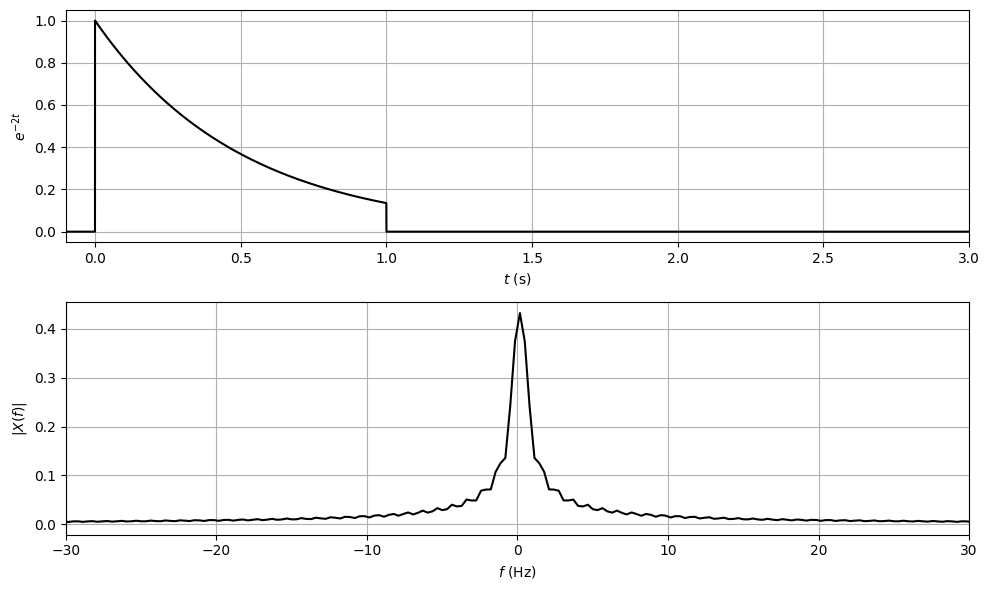

In [ ]:
Ts = 1e-4                               #Passo
t = np.arange(-0.1,3,Ts)                #Vetor de tempo

u = 1*(t>=0) - 1*(t>=1)
x = np.exp(-2*t)*u
f, xf = ctft(x, Ts)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,x,'k')
plt.xlabel('$t$ (s)')
plt.ylabel('$e^{-2t}$')
plt.grid()
plt.xlim(-0.1,3);

plt.subplot(2,1,2)
plt.plot(f,np.abs(xf),'k')
plt.xlabel('$f$ (Hz)')
plt.ylabel('$|X(f)|$')
plt.grid()
plt.xlim(-30,30);

plt.tight_layout()

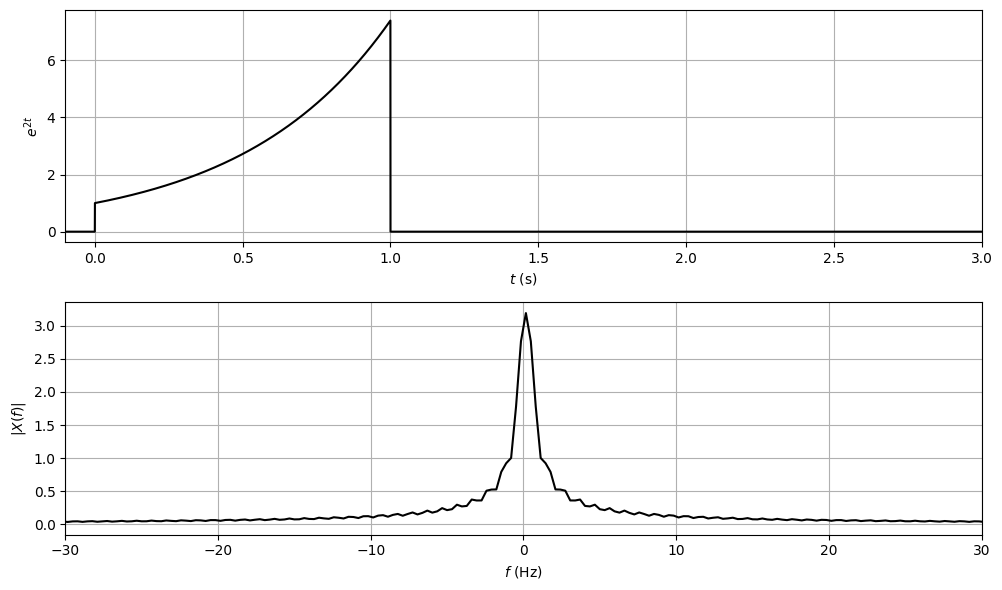

In [ ]:
Ts = 1e-4                               #Passo
t = np.arange(-0.1,3,Ts)                #Vetor de tempo

u = 1*(t>=0) - 1*(t>=1)
x = np.exp(2*t)*u
f, xf = ctft(x, Ts)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,x,'k')
plt.xlabel('$t$ (s)')
plt.ylabel('$e^{2t}$')
plt.grid()
plt.xlim(-0.1,3);

plt.subplot(2,1,2)
plt.plot(f,np.abs(xf),'k')
plt.xlabel('$f$ (Hz)')
plt.ylabel('$|X(f)|$')
plt.grid()
plt.xlim(-30,30);

plt.tight_layout()

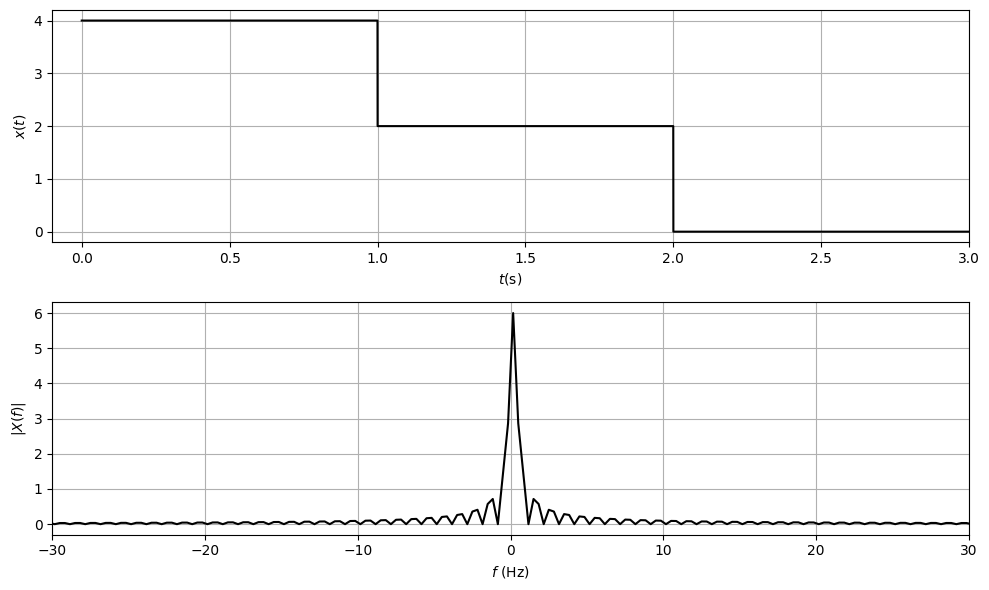

In [ ]:
Ts = 1e-4                               #Passo
t = np.arange(0,3,Ts)                   #Vetor de tempo
u = 2*(t>=0) - 2*(t>=1)
u1 = 2*(t>=0) - 2*(t>=2)
u_t = u + u1
x = u_t
f, xf = ctft(x, Ts)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,x,'k')
plt.xlabel('$t$(s)')
plt.ylabel('$x(t)$')
plt.grid()
plt.xlim(-0.1,3);

plt.subplot(2,1,2)
plt.plot(f,np.abs(xf),'k')
plt.xlabel('$f$ (Hz)')
plt.ylabel('$|X(f)|$')
plt.grid()
plt.xlim(-30,30);

plt.tight_layout()

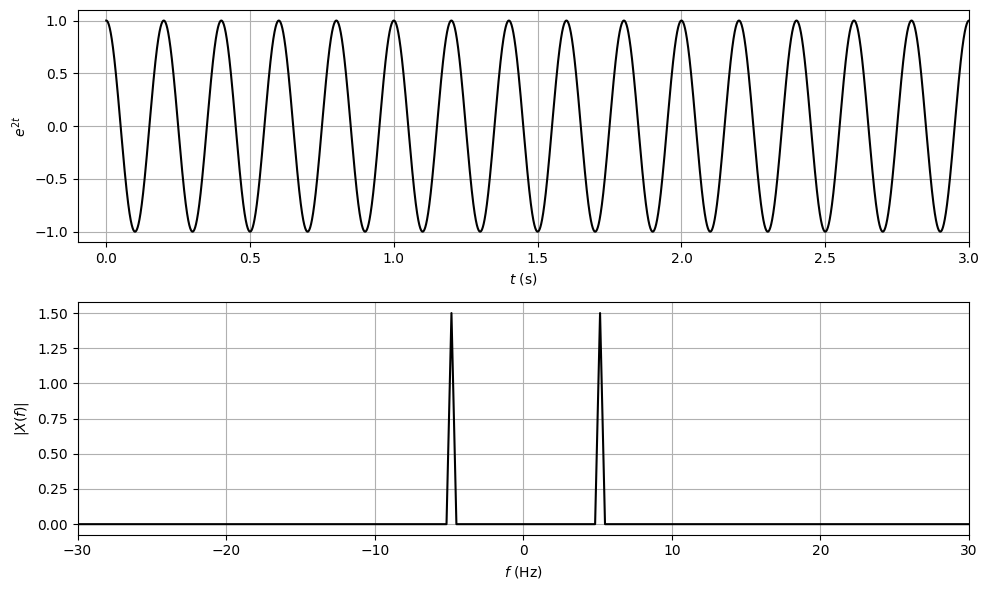

In [ ]:
Ts = 1e-4                               #Passo
t = np.arange(0,3,Ts)                   #Vetor de tempo

x = np.cos(10*np.pi*t)
f, xf = ctft(x, Ts)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,x,'k')
plt.xlabel('$t$ (s)')
plt.ylabel('$e^{2t}$')
plt.grid()
plt.xlim(-0.1,3);

plt.subplot(2,1,2)
plt.plot(f,np.abs(xf),'k')
plt.xlabel('$f$ (Hz)')
plt.ylabel('$|X(f)|$')
plt.grid()
plt.xlim(-30,30);

plt.tight_layout()

#5

$$\frac{d^2}{dt^2}y(t) + 5\frac{d}{dt}y(t) + 6y(t) = -\frac{d}{dt}x(t)$$

A função transferência para esse sistema pode ser obtida aplicando-se a transformada de Laplace em ambos lados da equação:

$$
(s^2 + 5s + 6)Y(s) = (-s)X(s)
$$

ou seja,

$$
\frac{Y(s)}{X(s)} = H(s) = \frac{-s}{s^2 + 5s + 6}
$$

###b)

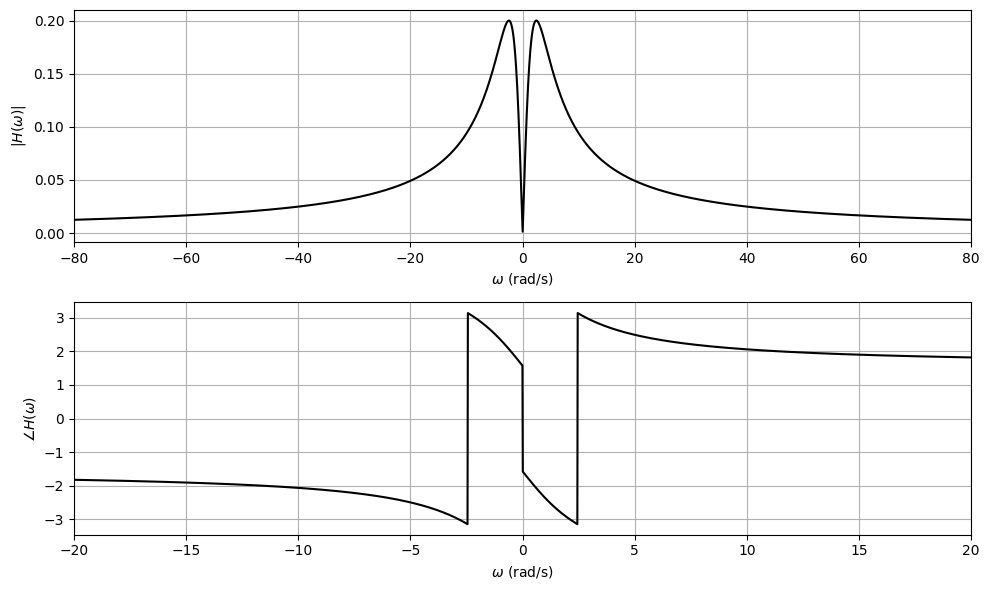

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

num = [-1, 0]
den = [1, 5, 6]
Hs = signal.TransferFunction(num, den)

w = np.linspace(-80,80,10000)
_, Hw = signal.freqresp(Hs, w)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(w,np.abs(Hw),'k')
plt.xlabel('$\\omega$ (rad/s)')
plt.ylabel('$|H(\omega)|$')
plt.grid()
plt.xlim(min(w),max(w));

plt.subplot(2,1,2)
plt.plot(w,np.angle(Hw),'k')
plt.xlabel('$\\omega$ (rad/s)')
plt.ylabel('$\\angle H(\omega)$')
plt.grid()
plt.xlim(min(w)/4,max(w)/4);
plt.tight_layout()

passa-faixa

#6

###a)

$$H(w)=\frac{-1}{j\omega - 2}$$

Colocando no domínio de Laplace:

$$H(w)=\frac{-1}{s - 2}$$

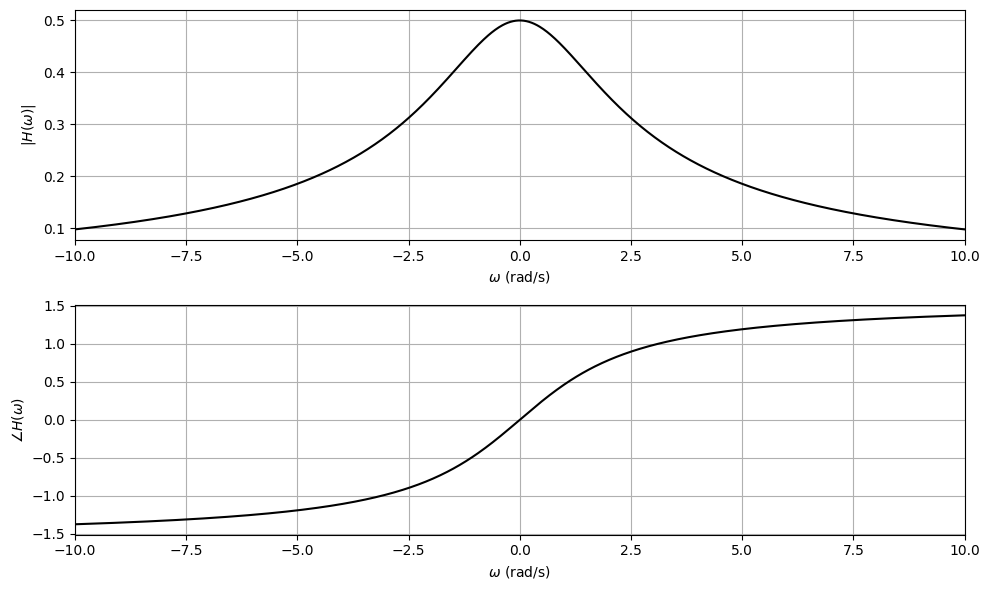

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

num = [-1]
den = [1, -2]
Hs = signal.TransferFunction(num, den)

w = np.linspace(-10,10,1000)
_, Hw = signal.freqresp(Hs, w)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(w,np.abs(Hw),'k')
plt.xlabel('$\\omega$ (rad/s)')
plt.ylabel('$|H(\omega)|$')
plt.grid()
plt.xlim(min(w),max(w));

plt.subplot(2,1,2)
plt.plot(w,np.angle(Hw),'k')
plt.xlabel('$\\omega$ (rad/s)')
plt.ylabel('$\\angle H(\omega)$')
plt.grid()
plt.xlim(min(w),max(w));
plt.tight_layout()

passa-baixa

#**7**

###a)

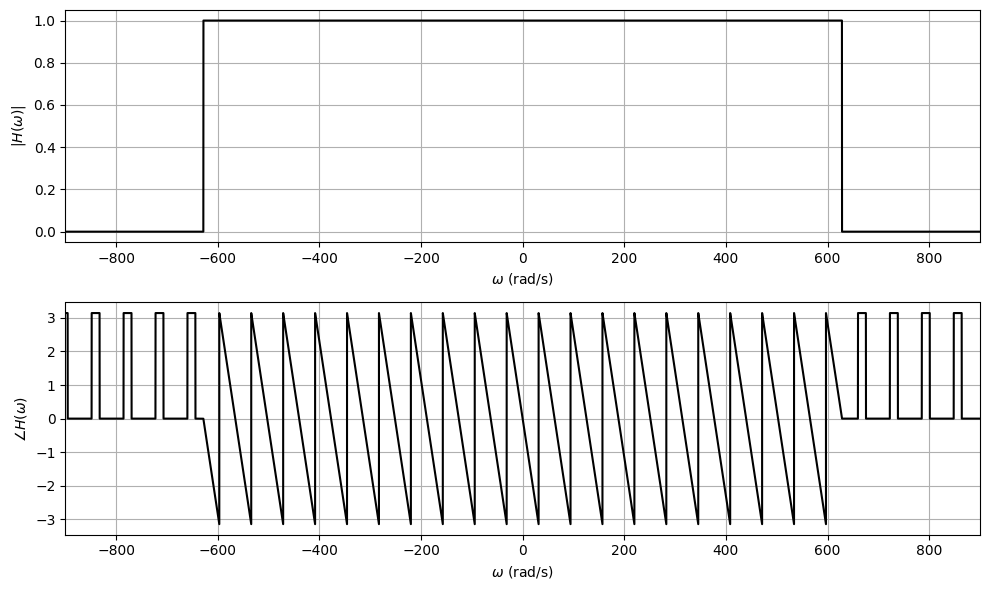

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

#Parametrizacao de simulacao
Ts = 1e-2                                              #Passo
w = np.arange(-300*np.pi,300*np.pi,Ts)                  #Vetor de tempo
Hw = (np.exp(-1j*0.1*w))*(np.abs(w)<=200*np.pi)         #Cria o meu sinal

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(w,np.abs(Hw),'k')
plt.xlabel('$\\omega$ (rad/s)')
plt.ylabel('$|H(\omega)|$')
plt.grid()
plt.xlim(-900,900);

plt.subplot(2,1,2)
plt.plot(w,np.angle(Hw),'k')
plt.xlabel('$\\omega$ (rad/s)')
plt.ylabel('$\\angle H(\omega)$')
plt.grid()
plt.xlim(-900,900);
plt.tight_layout()

passa-baixa

###e)

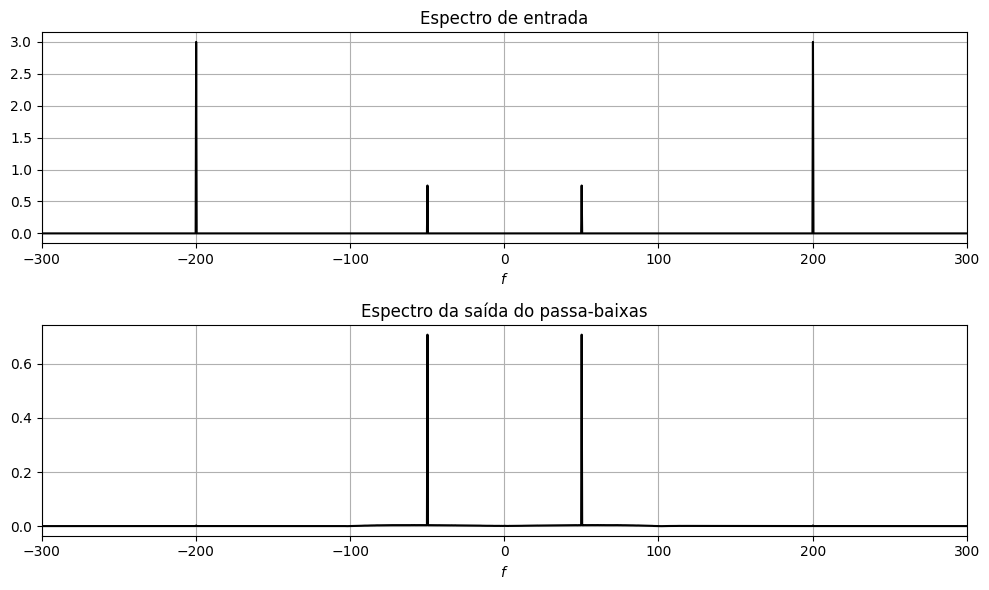

In [ ]:
import numpy as np                      #Importa a biblioteca numpy
import scipy.signal as signal
import numpy.fft as fft                 #Importa a biblioteca numpy.fft
import numpy.random as rnd              #Importa a biblioteca numpy.random
import matplotlib.pyplot as plt         #Importa a biblioteca matplotlib.pyplot

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

#Parametrizacao de simulacao
Ts = 1e-4                                #Passo
t = np.arange(0,3,Ts)                    #Vetor de tempo
x = 0.5*np.cos(100*np.pi*t) + 2*np.cos(400*np.pi*t + np.pi/4)
f,Xf = ctft(x,Ts)
ordem = 10                                           # ordem do filtro
Fs = 1/Ts

#Filtro Passa-Baixas
fc = 100                                            # frequência de corte
Wn = fc / (Fs/2)                                     # frequência de corte normalizada
b_lp, a_lp = signal.butter(ordem, Wn, btype='low')   # cálculo dos coeficientes do filtro
x_lp = signal.lfilter(b_lp, a_lp, x)
f,X_lp_f = ctft(x_lp,Ts)

#Plotar o sinal no tempo e na frequencia
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(f,np.abs(Xf),'k')
plt.xlabel('$f$')
plt.title('Espectro de entrada')
plt.grid()
plt.tight_layout()
plt.xlim(-300,300);

plt.subplot(2,1,2)
plt.plot(f,np.abs(X_lp_f),'k')
plt.xlabel('$f$')
plt.title('Espectro da saída do passa-baixas')
plt.grid()
plt.tight_layout()
plt.xlim(-300,300);

#8

###c)

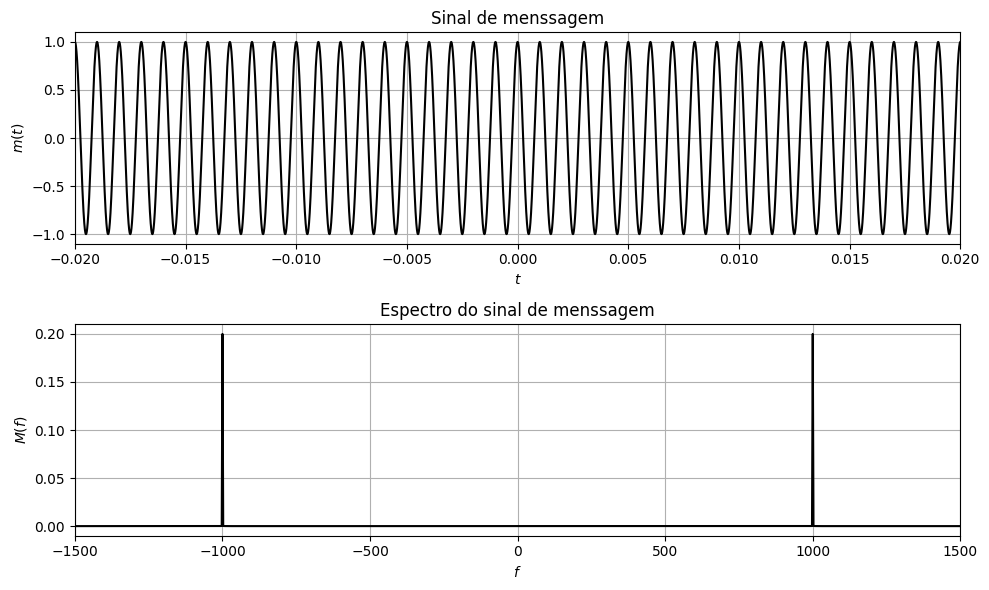

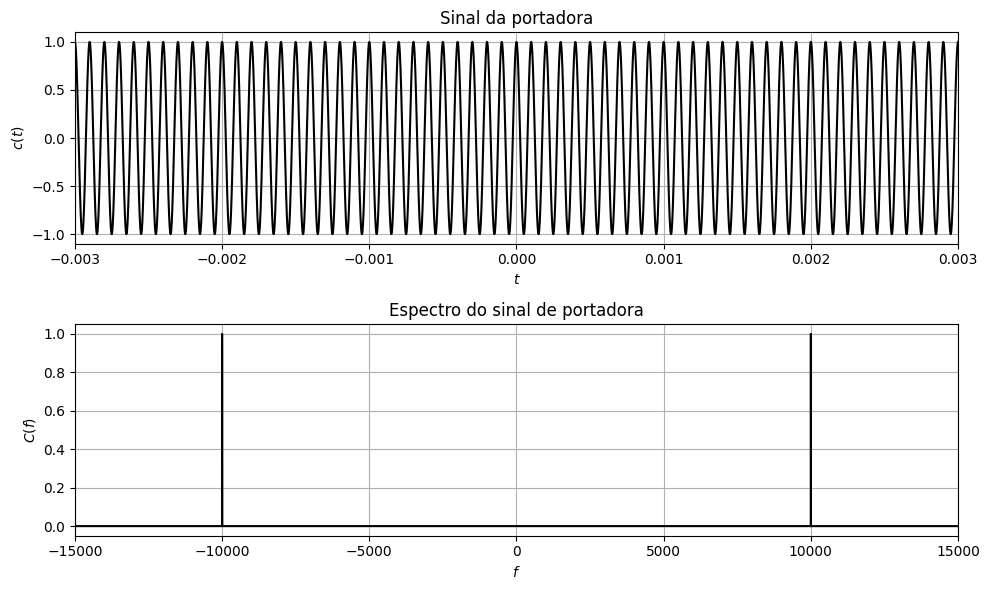

In [ ]:
import numpy as np
import numpy.fft as fft
import scipy.signal as signal
import matplotlib.pyplot as plt

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

#Parametrizacao de simulacao
Ts = 1e-6                                 #Passo
t = np.arange(-0.2,0.2,Ts)                #Vetor de tempo da menssagem
t_c = np.arange(-1,1,Ts)                  #Vetor de tempo da portadora

fm = 1000
fc = 10000

#Cria o sinal de mensagem
m = np.cos(2*np.pi*fm*t)
f, Mf = ctft(m,Ts)

carrier = np.cos(2*np.pi*fc*t_c)
f_c, Cf = ctft(carrier,Ts)

#Plot do sinal de mensagem
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,m,'k')
plt.title('Sinal de menssagem')
plt.ylabel('$m(t)$')
plt.xlabel('$t$')
plt.xlim(min(t)/10,max(t)/10)
plt.grid()
plt.subplot(2,1,2)
plt.plot(f,np.abs(Mf),'k')
plt.title('Espectro do sinal de menssagem')
plt.ylabel('$M(f)$')
plt.xlabel('$f$')
plt.xlim(-1500,1500)
plt.grid()
plt.tight_layout()

#Plot do sinal da portadora
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t_c,carrier,'k')
plt.title('Sinal da portadora')
plt.ylabel('$c(t)$')
plt.xlabel('$t$')
plt.xlim(-0.003,0.003)
plt.grid()
plt.subplot(2,1,2)
plt.plot(f_c,np.abs(Cf),'k')
plt.title('Espectro do sinal de portadora')
plt.ylabel('$C(f)$')
plt.xlabel('$f$')
plt.xlim(-15000,15000)
plt.grid()
plt.tight_layout()

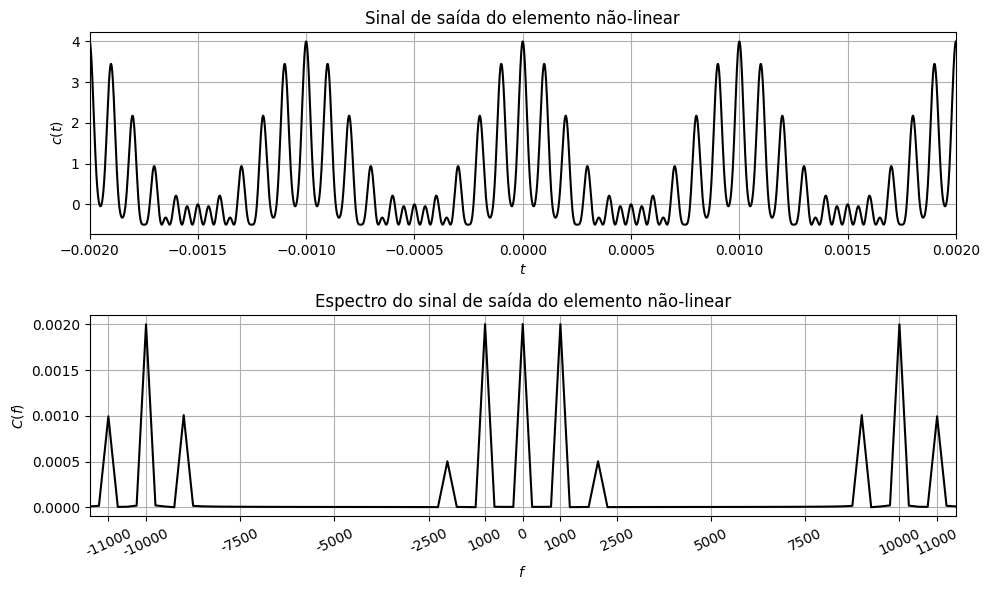

In [ ]:
import numpy as np
import numpy.fft as fft
import scipy.signal as signal
import matplotlib.pyplot as plt

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

#Parametrizacao de simulacao
Ts = 1e-6                                 #Passo
t = np.arange(-0.002,0.002,Ts)                #Vetor de tempo

m = np.cos(2*np.pi*fm*t)

x = m + np.cos(2*np.pi*fc*t)
y = x + (1/2)*x**2
f ,Yw = ctft(y, Ts)

#Plot do sinal de saida do elemnto não-linear
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,y,'k')
plt.ylabel('$c(t)$')
plt.title('Sinal de saída do elemento não-linear')
plt.xlabel('$t$')
plt.xlim(-0.002,0.002)
plt.grid()
plt.subplot(2,1,2)
plt.plot(f,np.abs(Yw),'k')
plt.title('Espectro do sinal de saída do elemento não-linear')
plt.ylabel('$C(f)$')
plt.xlabel('$f$')
plt.xlim(-11500,11500)
plt.xticks([-11000,-10000,-7500,-5000,-2500,-1000,0,1000,2500,5000,7500,10000,11000],['-11000','-10000','-7500','-5000','-2500','1000','0','1000','2500','5000','7500','10000','11000'], rotation = 25)
plt.grid()
plt.tight_layout()

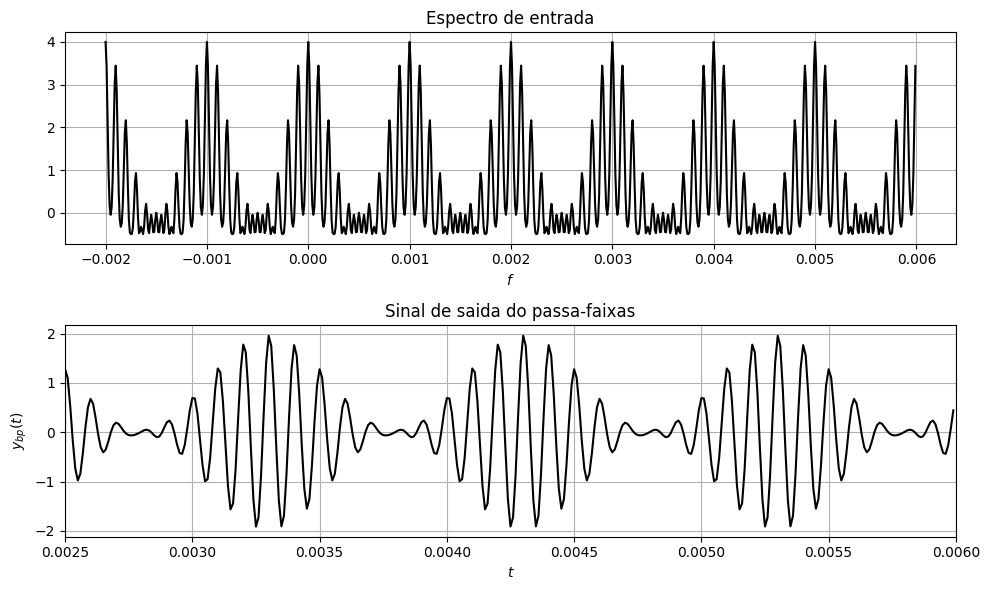

In [ ]:
import numpy as np                      #Importa a biblioteca numpy
import scipy.signal as signal
import numpy.fft as fft                 #Importa a biblioteca numpy.fft
import numpy.random as rnd              #Importa a biblioteca numpy.random
import matplotlib.pyplot as plt         #Importa a biblioteca matplotlib.pyplot

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

#Parametrizacao de simulacao
fm = 1000     # frequencia da mensagem
fc = 10000    # frequencia da portadora

#Parametrizacao de simulacao
Ts = 1e-5                                #Passo
t = np.arange(-.002,0.006,Ts)                    #Vetor de tempo

m = np.cos(2*np.pi*fm*t)

x = m + np.cos(2*np.pi*fc*t)
y = x + (1/2)*x**2
f ,Yw = ctft(y, Ts)

ordem = 4                               # ordem do filtro
Fs = 1/Ts

#Filtro Passa-Bandas
fc1 = 8500                                                   # frequência de corte inferior
fc2 = 11500                                                  # frequencia de corte superior
Wn1 = fc1 / (Fs/2)                                           # frequência de corte inferior normalizada
Wn2 = fc2 / (Fs/2)                                           # frequência de corte superior normalizada
b_bp, a_bp = signal.butter(ordem, [Wn1,Wn2], btype='band')   # cálculo dos coeficientes do filtro
y_bp = signal.lfilter(b_bp, a_bp, y)

#Plotar o sinal no tempo e na frequencia
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t , y,'k')
plt.xlabel('$f$')
plt.title('Espectro de entrada')
plt.grid()

plt.subplot(2,1,2)
plt.plot(t, y_bp,'k')
plt.xlabel('$t$')
plt.ylabel('$y_{bp}(t)$')
plt.title('Sinal de saida do passa-faixas')
plt.xlim(0.0025, 0.006)
plt.grid()

plt.tight_layout()

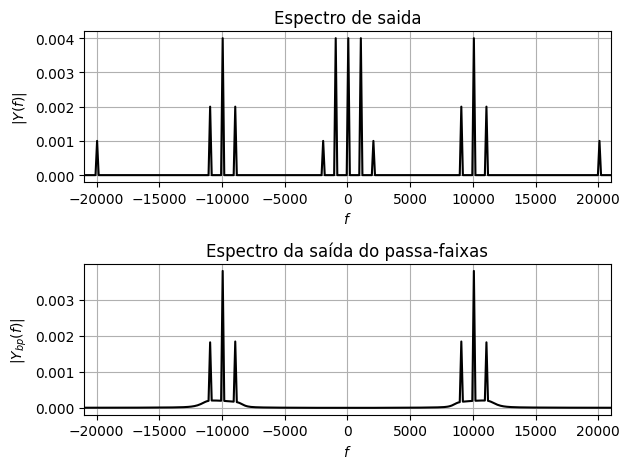

In [ ]:
import numpy as np                      #Importa a biblioteca numpy
import scipy.signal as signal
import numpy.fft as fft                 #Importa a biblioteca numpy.fft
import numpy.random as rnd              #Importa a biblioteca numpy.random
import matplotlib.pyplot as plt         #Importa a biblioteca matplotlib.pyplot

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

#Parametrizacao de simulacao
fm = 1000     # frequencia da mensagem
fc = 10000    # frequencia da portadora

#Parametrizacao de simulacao
Ts = 1e-5                                #Passo
t = np.arange(-.002,0.006,Ts)                    #Vetor de tempo

m = np.cos(2*np.pi*fm*t)

x = m + np.cos(2*np.pi*fc*t)
y = x + (1/2)*x**2
f ,Yw = ctft(y, Ts)

ordem = 4                               # ordem do filtro
Fs = 1/Ts

#Filtro Passa-Bandas
fc1 = 8500                                                   # frequência de corte inferior
fc2 = 11500                                                  # frequencia de corte superior
Wn1 = fc1 / (Fs/2)                                           # frequência de corte inferior normalizada
Wn2 = fc2 / (Fs/2)                                           # frequência de corte superior normalizada
b_bp, a_bp = signal.butter(ordem, [Wn1,Wn2], btype='band')   # cálculo dos coeficientes do filtro
y_bp = signal.lfilter(b_bp, a_bp, y)
f_f,Y_bp_f = ctft(y_bp,Ts)

#Plotar o sinal no tempo e na frequencia
plt.figure()
plt.subplot(2,1,1)
plt.plot(f, np.abs(Yw),'k')
plt.xlabel('$f$')
plt.ylabel('$|Y(f)|$')
plt.title('Espectro de saida')
plt.grid()
plt.tight_layout()
plt.xlim(-21000,21000);

plt.subplot(2,1,2)
plt.plot(f_f, np.abs(Y_bp_f),'k')
plt.xlabel('$f$')
plt.ylabel('$|Y_{bp}(f)|$')
plt.title('Espectro da saída do passa-faixas')
plt.grid()
plt.xlim(-21000,21000);

plt.tight_layout()

#9

###b)

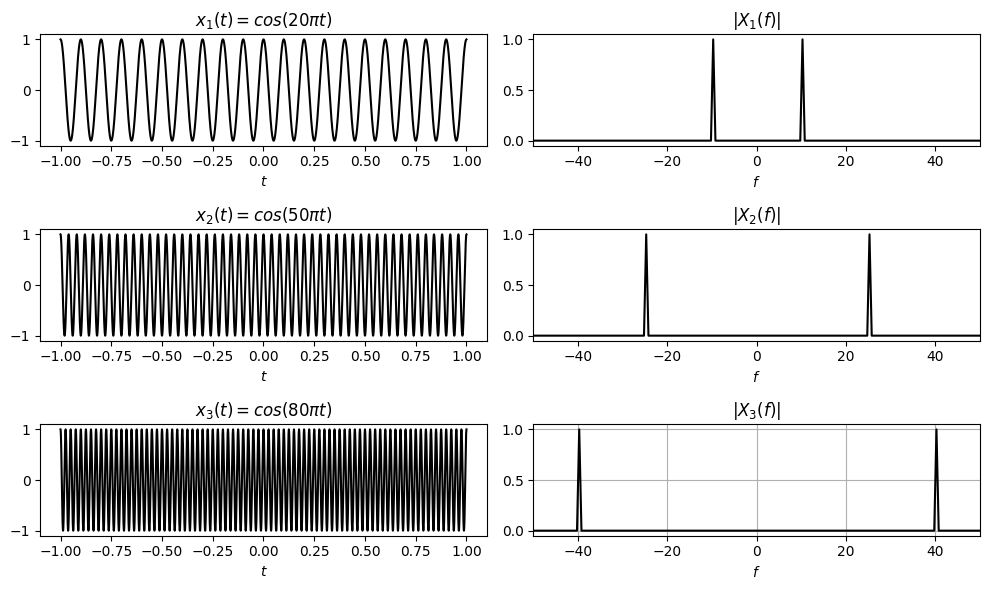

In [ ]:
import numpy as np                      #Importa a biblioteca numpy
import scipy.signal as signal
import numpy.fft as fft                 #Importa a biblioteca numpy.fft
import numpy.random as rnd              #Importa a biblioteca numpy.random
import matplotlib.pyplot as plt         #Importa a biblioteca matplotlib.pyplot

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

# Parametrizacao de simulacao:
Ts = 1e-4                                # Passo
t = np.arange(-1,1,Ts)                   # Vetor de tempo

x1 = np.cos(20*np.pi*t)
x2 = np.cos(50*np.pi*t)
x3 = np.cos(80*np.pi*t)

f_X1,Xf1 = ctft(x1,Ts)
f_X2,Xf2 = ctft(x2,Ts)
f_X3,Xf3 = ctft(x3,Ts)

# Plotar o sinal no tempo e na frequencia

plt.figure(figsize=(10, 6))
plt.subplot(3,2,1)
plt.plot(t, x1,'k')
plt.xlabel('$t$')
plt.title('$x_1(t) = cos(20\pi t)$')

plt.subplot(3,2,2)
plt.plot(f_X1,np.abs(Xf1),'k')
plt.xlabel('$f$')
plt.title('$|X_1(f)|$')
plt.xlim(-50,50);

plt.subplot(3,2,3)
plt.plot(t, x2,'k')
plt.xlabel('$t$')
plt.title('$x_2(t) = cos(50\pi t)$')

plt.subplot(3,2,4)
plt.plot(f_X2,np.abs(Xf2),'k')
plt.xlabel('$f$')
plt.title('$|X_2(f)|$')
plt.xlim(-50,50);

plt.subplot(3,2,5)
plt.plot(t, x3,'k')
plt.xlabel('$t$')
plt.title('$x_3(t) = cos(80\pi t)$')

plt.subplot(3,2,6)
plt.plot(f_X3,np.abs(Xf3),'k')
plt.xlabel('$f$')
plt.title('$|X_3(f)|$')
plt.xlim(-50,50);

plt.grid()
plt.tight_layout()

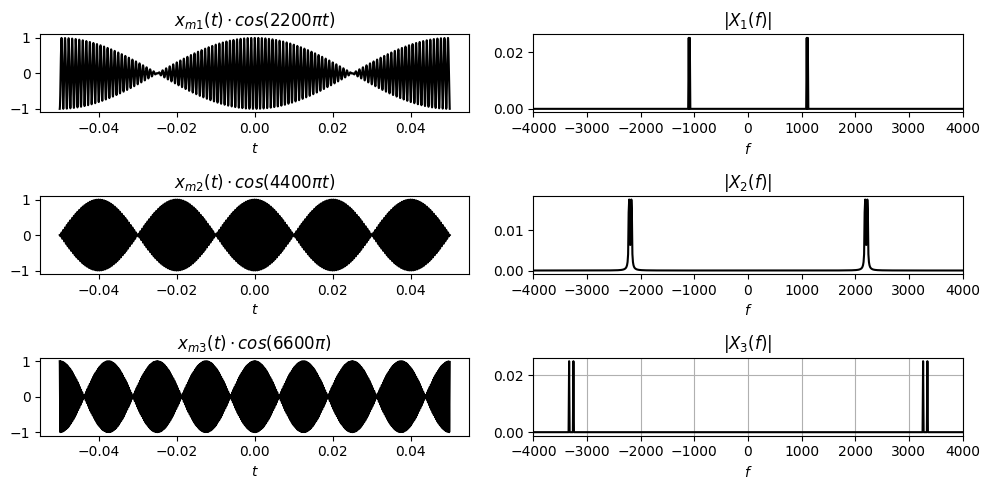

In [ ]:
import numpy as np                      #Importa a biblioteca numpy
import scipy.signal as signal
import numpy.fft as fft                 #Importa a biblioteca numpy.fft
import numpy.random as rnd              #Importa a biblioteca numpy.random
import matplotlib.pyplot as plt         #Importa a biblioteca matplotlib.pyplot

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

# Parametrizacao de simulacao:
Ts = 1e-5                                # Passo
t = np.arange(-0.05,0.05,Ts)             # Vetor de tempo

f1 = 1100
sub_carrier1 = np.cos(2*np.pi*f1*t)
f2 = 2200
sub_carrier2 = np.cos(2*np.pi*f2*t)
f3 = 3300
sub_carrier3 = np.cos(2*np.pi*f3*t)

x_m1 = np.cos(20*np.pi*t)*sub_carrier1
x_m2 = np.cos(50*np.pi*t)*sub_carrier2
x_m3 = np.cos(80*np.pi*t)*sub_carrier3

f_X1,Xf1 = ctft(x_m1,Ts)
f_X2,Xf2 = ctft(x_m2,Ts)
f_X3,Xf3 = ctft(x_m3,Ts)

# Plotar o sinal no tempo e na frequencia modulados

plt.figure(figsize=(10, 6))
plt.subplot(3,2,1)
plt.plot(t, x_m1,'k')
plt.xlabel('$t$')
plt.title('$x_{m1}(t) \cdot cos(2200\pi t)$')

plt.subplot(3,2,2)
plt.plot(f_X1,np.abs(Xf1),'k')
plt.xlabel('$f$')
plt.title('$|X_1(f)|$')
plt.xlim(-4000,4000);

plt.subplot(3,2,3)
plt.plot(t, x_m2,'k')
plt.xlabel('$t$')
plt.title('$x_{m2}(t) \cdot cos(4400\pi t)$')

plt.subplot(3,2,4)
plt.plot(f_X2,np.abs(Xf2),'k')
plt.xlabel('$f$')
plt.title('$|X_2(f)|$')
plt.xlim(-4000,4000);

plt.subplot(3,2,5)
plt.plot(t, x_m3,'k')
plt.xlabel('$t$')
plt.title('$x_{m3}(t) \cdot cos(6600\pi )$')

plt.subplot(3,2,6)
plt.plot(f_X3,np.abs(Xf3),'k')
plt.xlabel('$f$')
plt.title('$|X_3(f)|$')
plt.xlim(-4000,4000);

plt.grid()
plt.tight_layout()

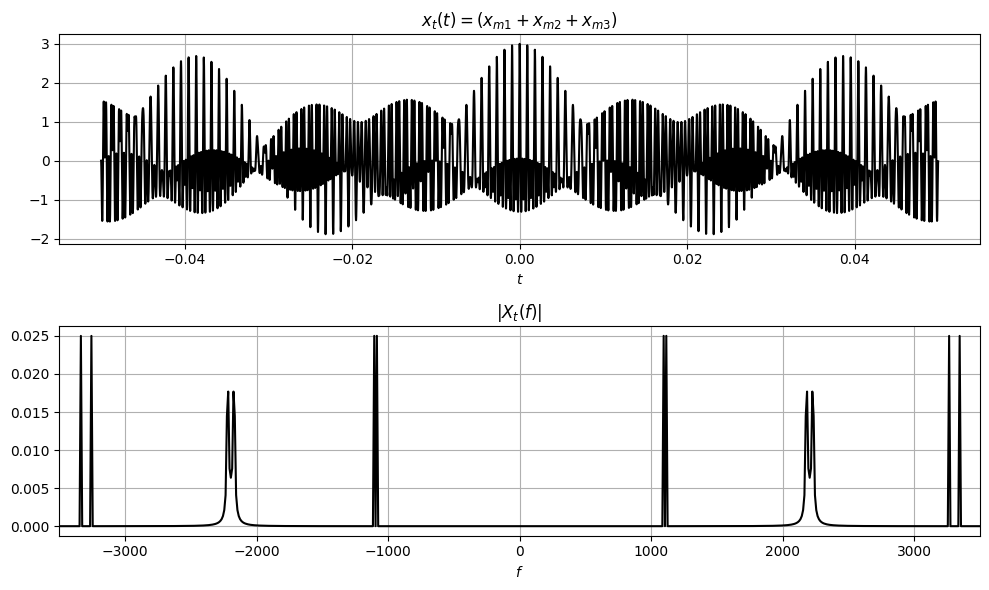

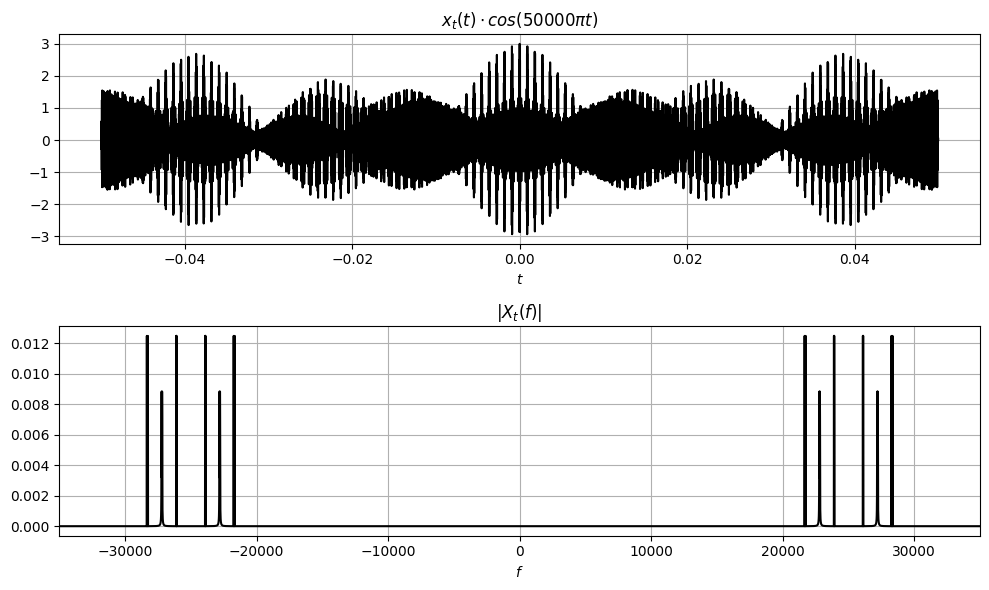

In [ ]:
import numpy as np                      #Importa a biblioteca numpy
import scipy.signal as signal
import numpy.fft as fft                 #Importa a biblioteca numpy.fft
import numpy.random as rnd              #Importa a biblioteca numpy.random
import matplotlib.pyplot as plt         #Importa a biblioteca matplotlib.pyplot

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf


# Parametrizacao de simulacao:
Ts = 1e-5                                # Passo
t = np.arange(-0.05,0.05,Ts)             # Vetor de tempo

fc = 25000
carrier = np.cos(2*np.pi*fc*t)

x_mux = (x_m1 + x_m2 + x_m3)
x_mc = x_mux*carrier

f_Xmux,Xfmux = ctft(x_mux,Ts)
f_Xc,Xfc = ctft(x_mc,Ts)


# Plotar o sinal no tempo e na frequencia modulados

plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
plt.plot(t, x_mux,'k')
plt.xlabel('$t$')
plt.title('$x_t(t) = (x_{m1} + x_{m2} + x_{m3})$')
plt.grid()

plt.subplot(2,1,2)
plt.plot(f_Xmux, np.abs(Xfmux),'k')
plt.xlabel('$f$')
plt.title('$|X_t(f)|$')
plt.xlim(-3500,3500);
plt.grid()
plt.tight_layout()

plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
plt.plot(t, x_mc,'k')
plt.xlabel('$t$')
plt.title('$x_t(t) \cdot cos(50000\pi t)$')
plt.grid()

plt.subplot(2,1,2)
plt.plot(f_Xc,np.abs(Xfc),'k')
plt.xlabel('$f$')
plt.title('$|X_t(f)|$')
plt.xlim(-35000,35000);
plt.grid()

plt.tight_layout()

Demodulação

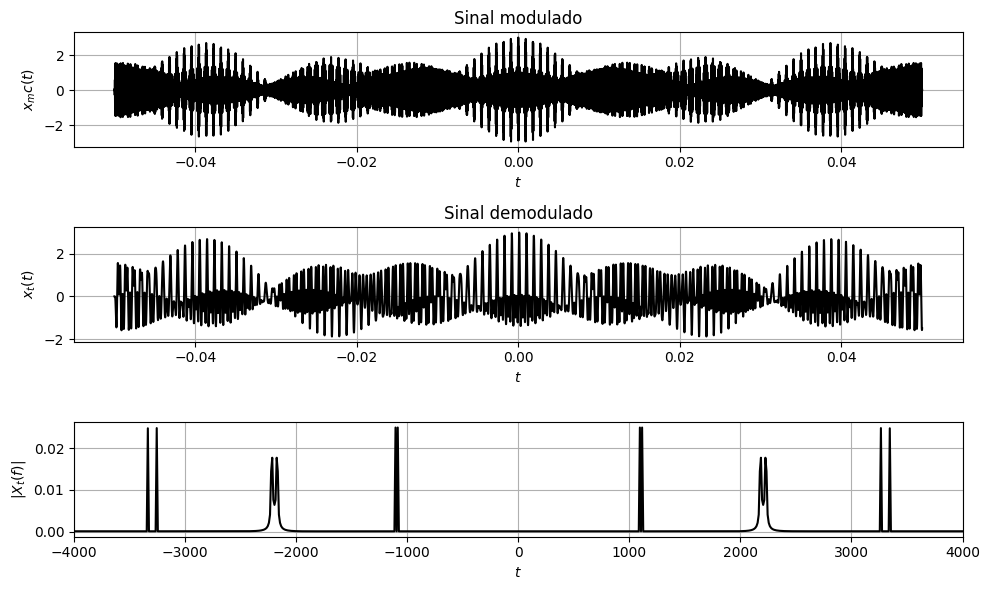

In [ ]:
import numpy as np                      #Importa a biblioteca numpy
import scipy.signal as signal
import numpy.fft as fft                 #Importa a biblioteca numpy.fft
import numpy.random as rnd              #Importa a biblioteca numpy.random
import matplotlib.pyplot as plt         #Importa a biblioteca matplotlib.pyplot

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

fc = 25000
carrier = np.cos(2*np.pi*fc*t)

# Parametrizacao de simulacao
Ts = 1e-5                                # Passo
t = np.arange(-0.05,0.05,Ts)             # Vetor de tempo

# Modulação:
xt_mod = x_mc*carrier

# Parâmetros do Filtro Passa-Baixas
ordem = 5                                               # ordem do filtro
Fs = 1/Ts
fc_lp = 5000                                            # frequência de corte
Wn = fc_lp / (Fs/2)                                     # frequência de corte normalizada
b_lp, a_lp = signal.butter(ordem, Wn, btype='low')      # cálculo dos coeficientes do filtro

# Aplicação do filtro:
r = 2*signal.lfilter(b_lp, a_lp, xt_mod)
f_R,Rf = ctft(r,Ts)

# Plotar o sinal no tempo e na frequencia
plt.figure(figsize=[10,6])
plt.subplot(3,1,1)
plt.plot(t, x_mc,'k')
plt.xlabel('$t$')
plt.ylabel('$x_mc(t)$')
plt.title('Sinal modulado')
plt.grid()

plt.subplot(3,1,2)
plt.plot(t, r,'k')
plt.xlabel('$t$')
plt.ylabel('$x_t(t)$')
plt.title('Sinal demodulado')
plt.grid()

plt.subplot(3,1,3)
plt.plot(f_R, np.abs(Rf),'k')
plt.xlabel('$t$')
plt.ylabel('$|X_t(f)|$')
plt.grid()
plt.xlim(-4000, 4000)

plt.tight_layout()

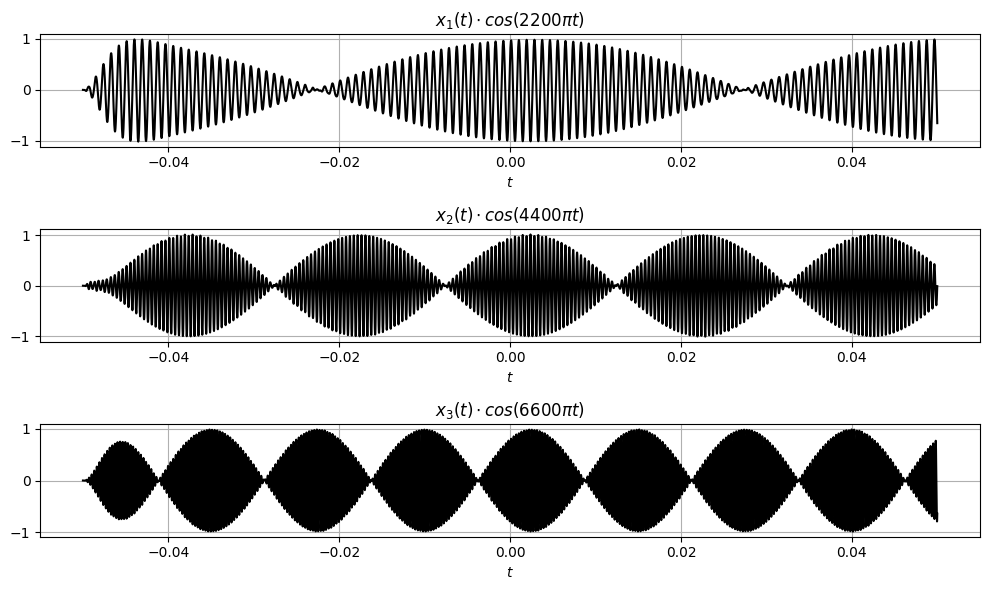

In [ ]:
import numpy as np                      #Importa a biblioteca numpy
import scipy.signal as signal
import numpy.fft as fft                 #Importa a biblioteca numpy.fft
import numpy.random as rnd              #Importa a biblioteca numpy.random
import matplotlib.pyplot as plt         #Importa a biblioteca matplotlib.pyplot

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf


# definindo frequência das sub-portadoras:
f1 = 1100
f2 = 2200
f3 = 3300

# Parametrizacao de simulacao
Ts = 1e-5                               # Passo
t = np.arange(-0.05,0.05,Ts)            # Vetor de tempo
ordem = 2                               # ordem do filtro
Fs = 1/Ts

#Filtro Passa-Bandas f1 = 1100 Hz:
f1_1 = 1000                                                        # frequência de corte inferior
f1_2 = 1200                                                        # frequencia de corte superior
Wn1_1 = f1_1 / (Fs/2)                                              # frequência de corte inferior normalizada
Wn1_2 = f1_2 / (Fs/2)                                              # frequência de corte superior normalizada
b_bp1, a_bp1 = signal.butter(ordem, [Wn1_1,Wn1_2], btype='band')   # cálculo dos coeficientes do filtro
r_bp1 = signal.lfilter(b_bp1, a_bp1, r)
f_X1,Xf_bp1 = ctft(r_bp1,Ts)

# #Filtro Passa-Bandas f2 = 2200 Hz:
fc2_1 = 2100                                                       # frequência de corte inferior
fc2_2 = 2300                                                       # frequencia de corte superior
Wn2_1 = fc2_1 / (Fs/2)                                             # frequência de corte inferior normalizada
Wn2_2 = fc2_2 / (Fs/2)                                             # frequência de corte superior normalizada
b_bp2, a_bp2 = signal.butter(ordem, [Wn2_1,Wn2_2], btype='band')   # cálculo dos coeficientes do filtro
r_bp2 = signal.lfilter(b_bp2, a_bp2, r)
f_X2,Xf_bp2 = ctft(r_bp2,Ts)

# #Filtro Passa-Bandas f3 = 3300 Hz:
fc3_1 = 3200                                                       # frequência de corte inferior
fc3_2 = 3400                                                       # frequencia de corte superior
Wn3_1 = fc3_1 / (Fs/2)                                             # frequência de corte inferior normalizada
Wn3_2 = fc3_2 / (Fs/2)                                             # frequência de corte superior normalizada
b_bp3, a_bp3 = signal.butter(ordem, [Wn3_1,Wn3_2], btype='band')   # cálculo dos coeficientes do filtro
r_bp3 = signal.lfilter(b_bp3, a_bp3, r)
f_X3,Xf_bp3 = ctft(r_bp3,Ts)

# Plotar o sinal no tempo:

plt.figure(figsize=[10,6])
plt.subplot(3,1,1)
plt.plot(t, r_bp1,'k')
plt.xlabel('$t$')
plt.title('$x_1(t)\cdot cos(2200 \pi t)$')
plt.grid()

plt.subplot(3,1,2)
plt.plot(t, r_bp2,'k')
plt.xlabel('$t$')
plt.title('$x_2(t)\cdot cos(4400 \pi t)$')
plt.grid()

plt.subplot(3,1,3)
plt.plot(t, r_bp3,'k')
plt.xlabel('$t$')
plt.title('$x_3(t)\cdot cos(6600 \pi t)$')
plt.grid()

plt.tight_layout()

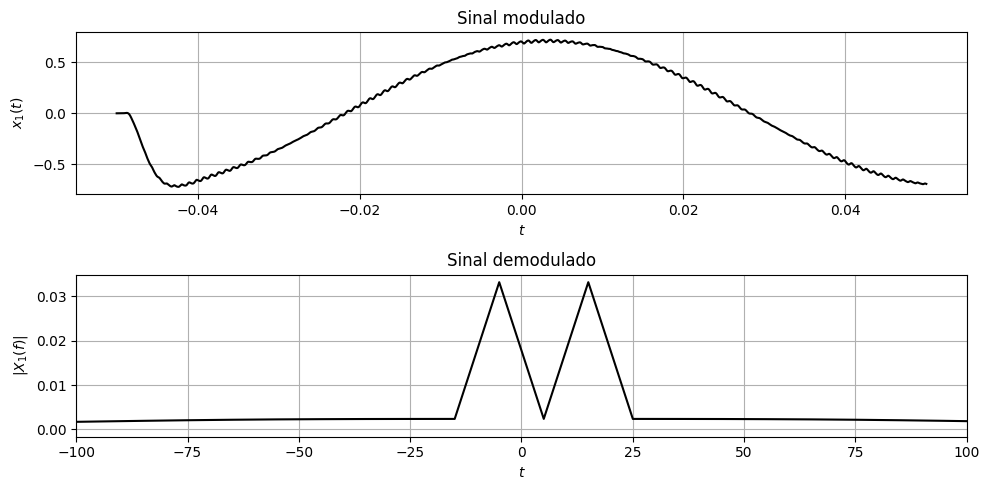

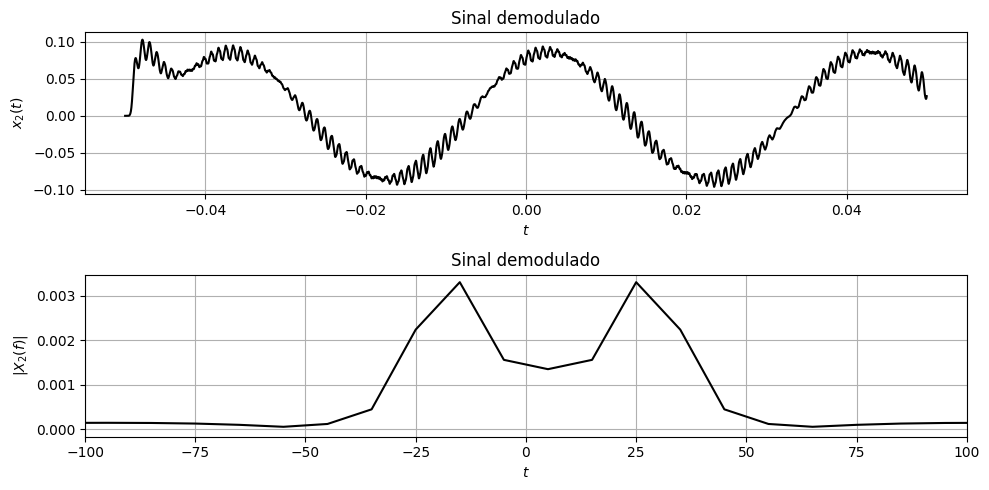

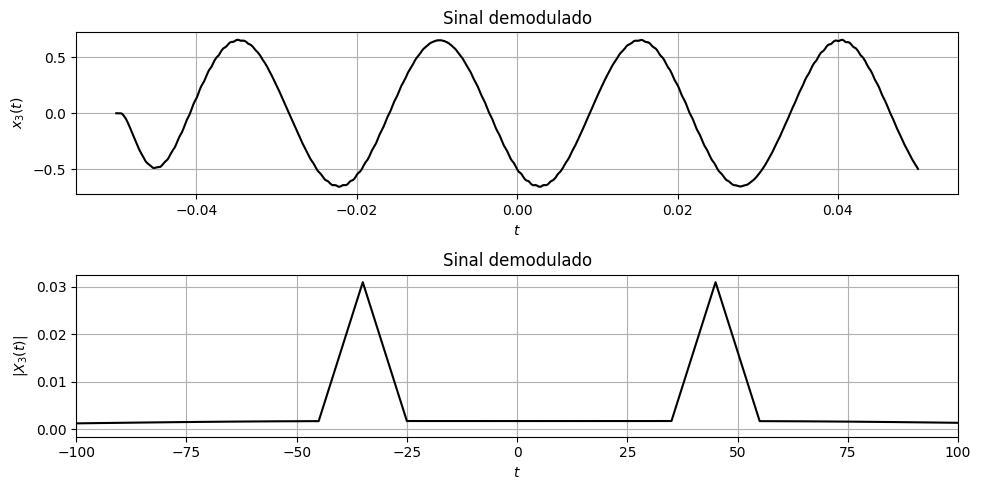

In [ ]:
import numpy as np                      #Importa a biblioteca numpy
import scipy.signal as signal
import numpy.fft as fft                 #Importa a biblioteca numpy.fft
import numpy.random as rnd              #Importa a biblioteca numpy.random
import matplotlib.pyplot as plt         #Importa a biblioteca matplotlib.pyplot

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

f1 = 1100
f2 = 2200
f3 = 3300

# Parametrizacao de simulacao
Ts = 1e-5                                # Passo
t = np.arange(-0.05,0.05,Ts)             # Vetor de tempo

# Modulação:
x1_mod = r_bp1*np.cos(2*np.pi*f1*t)
x2_mod = r_bp2*np.cos(2*np.pi*f2*t)
x3_mod = r_bp3*np.cos(2*np.pi*f3*t)

# Parâmetros do Filtro Passa-Baixas
ordem = 10                                               # ordem do filtro
Fs = 1/Ts

# Filtro Passa-baixas f1 = 1100 Hz:
fc_1 = 1150                                              # frequência de corte
Wn_1 = fc_1 / (Fs/2)                                     # frequência de corte normalizada
b_lp1, a_lp1 = signal.butter(ordem, Wn_1, btype='low')   # cálculo dos coeficientes do filtro
# Aplicação do filtro:
r1 = 2*signal.lfilter(b_lp1, a_lp1, x1_mod)
f_R1, Rf1 = ctft(r1,Ts)

fc_2 = 2250                                              # frequência de corte
Wn_2 = fc_2 / (Fs/2)                                     # frequência de corte normalizada
b_lp2, a_lp2 = signal.butter(ordem, Wn_2, btype='low')   # cálculo dos coeficientes do filtro

r2 = 2*signal.lfilter(b_lp2, a_lp2, x2_mod)
f_R2, Rf2 = ctft(r2,Ts)

fc_3 = 3350                                              # frequência de corte
Wn_3 = fc_3 / (Fs/2)                                     # frequência de corte normalizada
b_lp3, a_lp3 = signal.butter(ordem, Wn_3, btype='low')   # cálculo dos coeficientes do filtro

# Aplicação do filtro:
r3 = 2*signal.lfilter(b_lp3, a_lp3, x3_mod)
f_R3, Rf3 = ctft(r3,Ts)

plt.figure(figsize=[10,5])
plt.subplot(2,1,1)
plt.plot(t, r1,'k')
plt.xlabel('$t$')
plt.ylabel('$x_1(t)$')
plt.title('Sinal modulado')
plt.grid()

plt.subplot(2,1,2)
plt.plot(f_R1, np.abs(Rf1),'k')
plt.xlabel('$t$')
plt.ylabel('$|X_1(f)|$')
plt.title('Sinal demodulado')
plt.grid()
plt.xlim(-100, 100)
plt.tight_layout()

plt.figure(figsize=[10,5])
plt.subplot(2,1,1)
plt.plot(t, r2,'k')
plt.xlabel('$t$')
plt.ylabel('$x_2(t)$')
plt.title('Sinal demodulado')
plt.grid()

plt.subplot(2,1,2)
plt.plot(f_R2, np.abs(Rf2),'k')
plt.xlabel('$t$')
plt.ylabel('$|X_2(f)|$')
plt.title('Sinal demodulado')
plt.grid()
plt.xlim(-100, 100)
plt.tight_layout()

plt.figure(figsize=[10,5])
plt.subplot(2,1,1)
plt.plot(t, r3,'k')
plt.xlabel('$t$')
plt.ylabel('$x_3(t)$')
plt.title('Sinal demodulado')
plt.grid()

plt.subplot(2,1,2)
plt.plot(f_R3, np.abs(Rf3),'k')
plt.xlabel('$t$')
plt.ylabel('$|X_3(t)|$')
plt.title('Sinal demodulado')
plt.grid()
plt.xlim(-100, 100)
plt.tight_layout()

#10


###a)

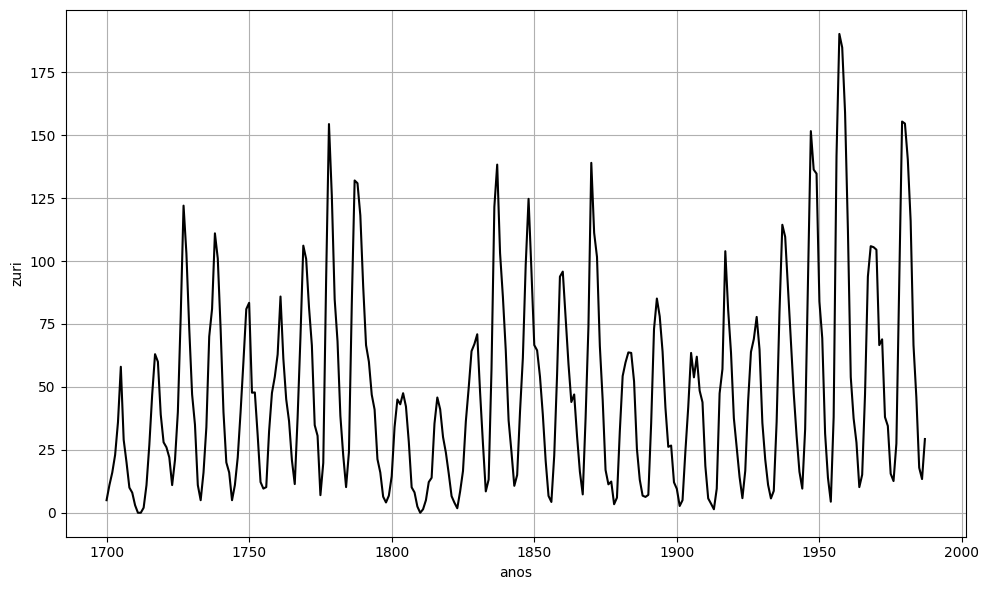

In [ ]:
from numpy import genfromtxt
dados = genfromtxt('/content/drive/MyDrive/Colab Notebooks/Prova-3/Arquivos usados/sunspot (1).csv', delimiter=',')

N = len(dados)
ano = np.zeros(N)
zuri = np.zeros(N)

for i in range(N):
    ano[i] = dados[i][0]
    zuri[i] = dados[i][1]

plt.figure(figsize=(10,6))
plt.plot(ano, zuri, 'k')
plt.xlabel('anos')
plt.ylabel('zurique')
plt.grid()

plt.tight_layout()

Considerando o espaço amostral de 1750 a 1850, temos 100 anos com 9 picos entre eles. Com isso, temos a periodicidade calculada por $\frac{100}{9}=11.11$

###b)

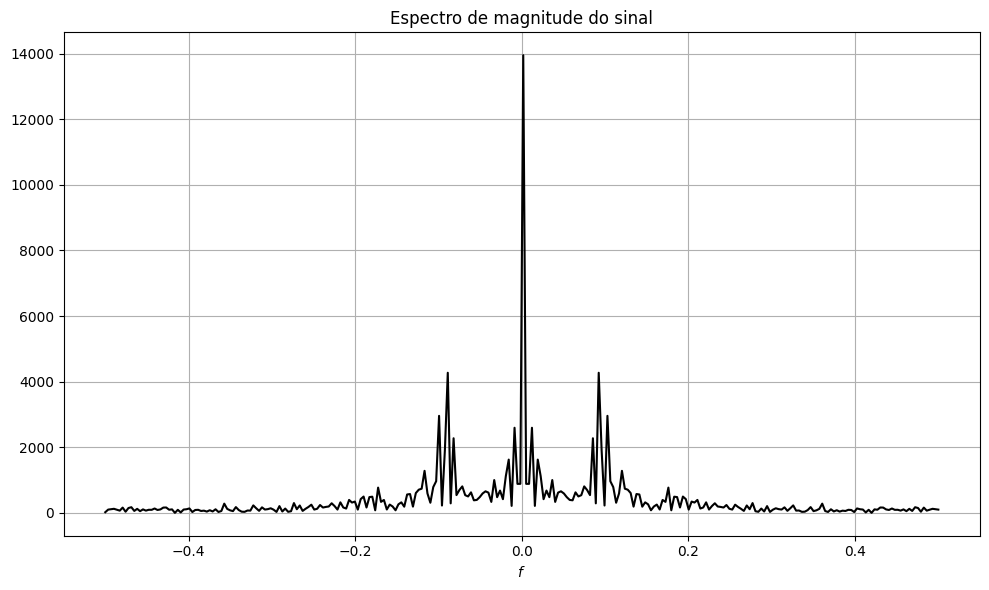

In [ ]:
import numpy as np                      #Importa a biblioteca numpy
import scipy.signal as signal
import numpy.fft as fft                 #Importa a biblioteca numpy.fft
import numpy.random as rnd              #Importa a biblioteca numpy.random
import matplotlib.pyplot as plt         #Importa a biblioteca matplotlib.pyplot

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

#Parametrizacao de simulacao
Ts = 1                                #Passo
t = np.arange(1700,2000,Ts)                    #Vetor de tempo

t, Z = ctft(zuri, Ts)

plt.figure(figsize=(10, 6))
plt.plot(t,np.abs(Z),'k')
plt.xlabel('$f$')
plt.title('Espectro de magnitude do sinal')
plt.grid()

plt.tight_layout()

###c)

Analisando os picos do espectro da transformada de Fourier, da pra perceber que suas localizações está proximas a 0.091 Hz, logo a periodicidade equivale $\frac{1}{0.091} = 11$

#11

###e)

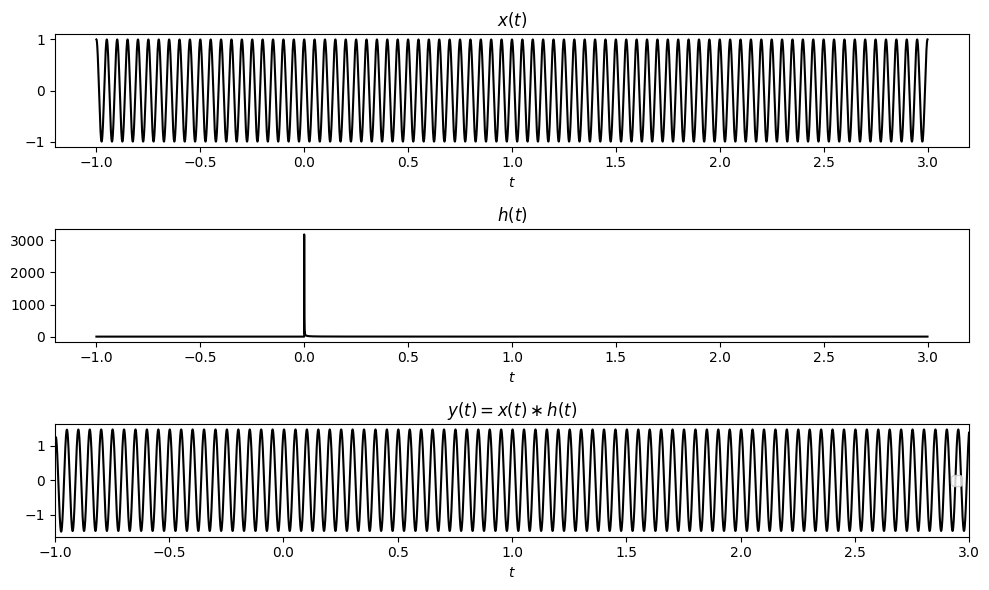

In [ ]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

Ts = 1e-4
t_min = -1
t_max = 3
t = np.arange(t_min, t_max, Ts)

x = np.cos(40*np.pi*t)
h = 1/(np.pi*t)*(t>=0)

y = Ts*np.convolve(x, h)
ty = np.arange(2*t_min, 2*t_max-Ts, Ts)

plt.figure(figsize=(10, 6))
plt.subplot(3,1,1)
plt.plot(t,x, 'k')
plt.title('$x(t)$')
plt.xlabel('$t$')

plt.subplot(3,1,2)
plt.plot(t,h, 'k')
plt.title('$h(t)$')
plt.xlabel('$t$')

plt.subplot(3,1,3)
plt.plot(ty,y, 'k')
plt.xlim([t_min,t_max])
plt.title('$y(t) = x(t) \\ast h(t)$')
plt.xlabel('$t$')
plt.legend()

plt.tight_layout()


###g)

(i)

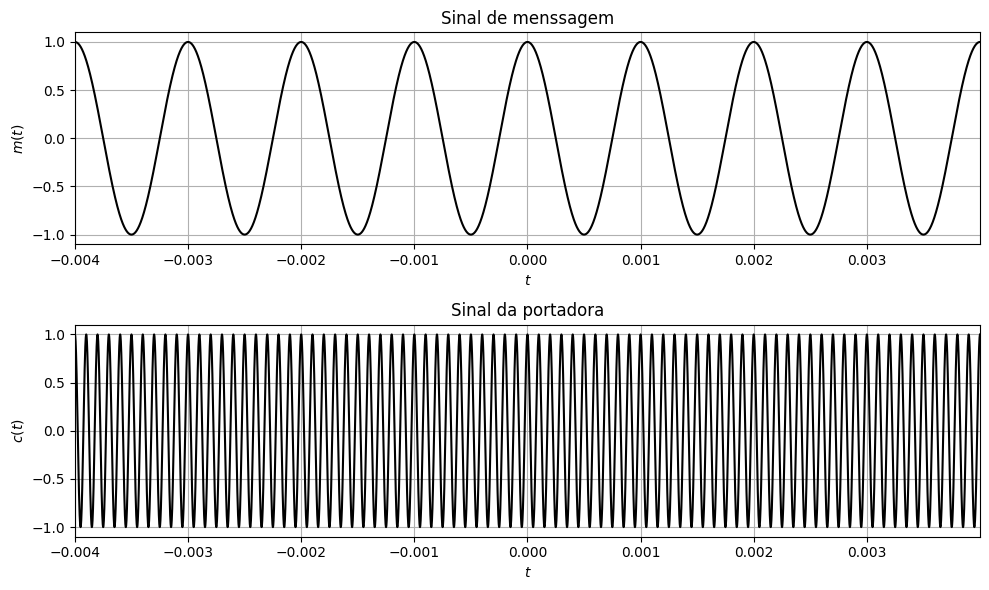

In [ ]:
import numpy as np
import numpy.fft as fft
import scipy.signal as signal
import matplotlib.pyplot as plt

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

#Parametrizacao de simulacao
Ts = 1e-6                                # Passo
t_min = -0.02
t_max = 0.02

t = np.arange(t_min, t_max, Ts)           # Vetor de tempo
fm = 1000
fc = 10000

#Cria o sinal de mensagem
m = np.cos(2*np.pi*fm*t)
f, Mf = ctft(m,Ts)

carrier = np.cos(2*np.pi*fc*t)
f_c, Cf = ctft(carrier,Ts)

#Plot do sinal de mensagem
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t,m,'k')
plt.title('Sinal de menssagem')
plt.ylabel('$m(t)$')
plt.xlabel('$t$')
plt.xlim(min(t)/5,max(t)/5)
plt.grid()

#Plot do sinal da portadora
plt.subplot(2,1,2)
plt.plot(t,carrier,'k')
plt.title('Sinal da portadora')
plt.ylabel('$c(t)$')
plt.xlabel('$t$')
plt.xlim(min(t)/5,max(t)/5)
plt.grid()

plt.tight_layout()

(ii)

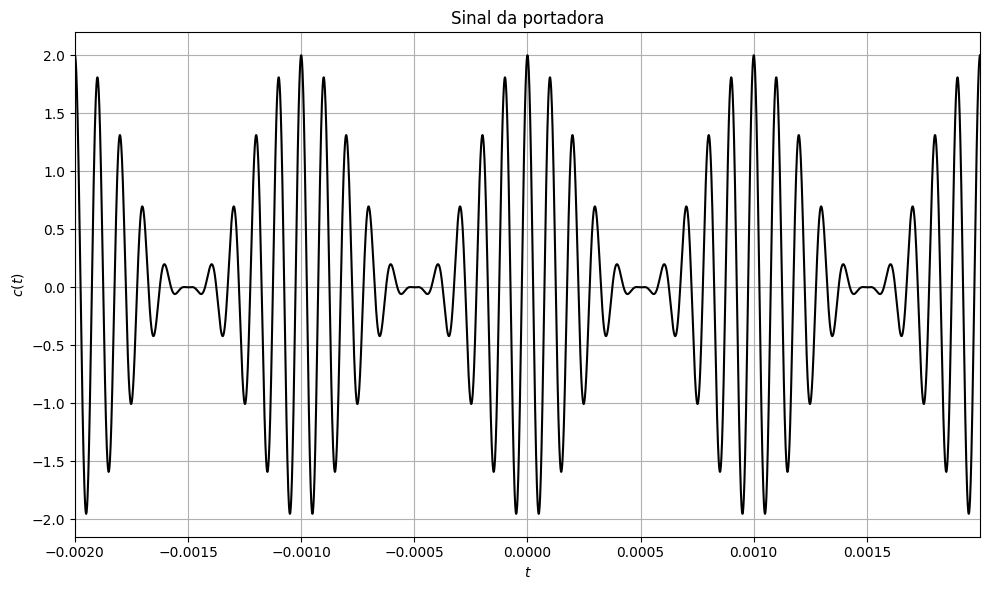

In [ ]:
a = (1 + m)*carrier

plt.figure(figsize=(10, 6))
plt.plot(t,a,'k')
plt.title('Sinal da portadora')
plt.ylabel('$c(t)$')
plt.xlabel('$t$')
plt.xlim(min(t)/10,max(t)/10)
plt.grid()

plt.tight_layout()

(iii)

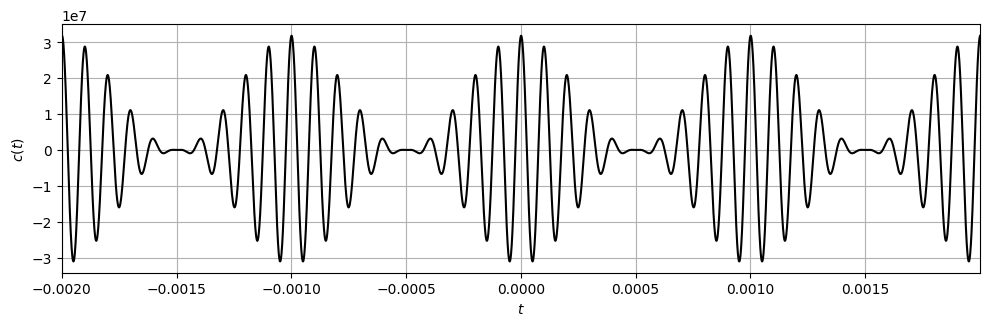

In [ ]:
import scipy.signal as signal
import numpy as np                      #Importa a biblioteca numpy
import matplotlib.pyplot as plt         #Importa a biblioteca matplotlib.pyplot

#Parametrizacao de simulacao
Ts = 1e-6                                # Passo
t_min = -0.02
t_max = 0.02

t = np.arange(t_min, t_max, Ts)           # Vetor de tempo

h = 1/(np.pi*t)*(t>=0)

a_tilde = Ts*np.convolve(a, h)
# Redefinindo arange:
N = len(a_tilde)//2
a_tilde = a_tilde[(N//2):((N + N//2))]
ty = np.arange(t_min, t_max-Ts, Ts)

# Plot do sinal AM demodulado:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(ty,a_tilde,'k')
plt.ylabel('$c(t)$')
plt.xlabel('$t$')
plt.xlim(min(t)/10,max(t)/10)
plt.grid()
plt.tight_layout()

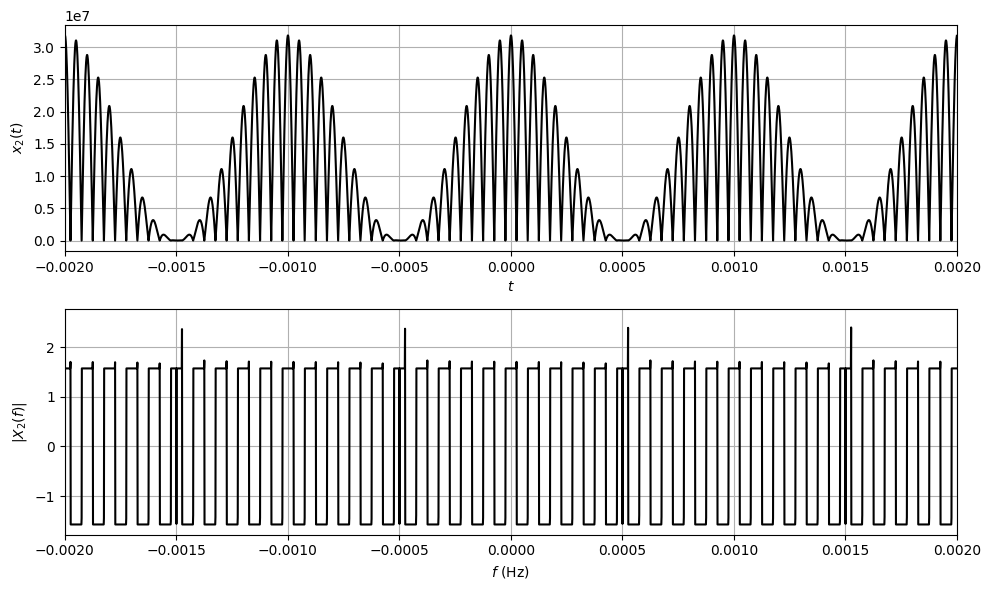

In [ ]:
import scipy.signal as signal
import numpy as np                      #Importa a biblioteca numpy
import matplotlib.pyplot as plt         #Importa a biblioteca matplotlib.pyplot

a = a[:N]
z = a + 1j*a_tilde

A = np.abs(z)
phi = np.angle(z)

#Plotar o sinal no tempo e na frequencia
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(ty,np.abs(z),'k')
plt.xlabel('$t$')
plt.ylabel('$x_2(t)$')
plt.grid()
plt.xlim(-0.002,0.002);

plt.subplot(2,1,2)
plt.plot(ty,np.angle(z),'k')
plt.xlabel('$f$ (Hz)')
plt.ylabel('$|X_2(f)|$')
plt.grid()
plt.xlim(-0.002,0.002);

plt.tight_layout()